### Variable star lightcurves with forced photometry history (alert schema v3.5+)

Because of the presence of flux in the reference image, alerts for variable stars require additional processing to get appropriate photometry.

Starting with schema version v3.5, the prv_candidates history uses forced photometry rather than a query for past detections.  This requires different handling.

In [1]:
%matplotlib inline
import os
import io
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from avro.datafile import DataFileReader, DataFileWriter
from avro.io import DatumReader, DatumWriter
import fastavro

from astropy.time import Time
from astropy.io import fits
import aplpy


### Read in an example

In [2]:
fname = '../../ztf-avro-alert/data/1661382530015060001.avro'

In [3]:
with open(fname,'rb') as f:
    freader = fastavro.reader(f)
    schema = freader.schema

    for packet in freader:
        print(packet.keys())

dict_keys(['schemavsn', 'publisher', 'objectId', 'candid', 'candidate', 'prv_candidates', 'cutoutScience', 'cutoutTemplate', 'cutoutDifference'])


/Users/ebellm/anaconda3/envs/zads/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The 'schema' attribute is deprecated. Please use 'writer_schema'
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
packet['objectId']

'ZTF18aaxjdyr'

In [5]:
def make_dataframe(packet):
    df = pd.DataFrame(packet['candidate'], index=[0])
    df_prv = pd.DataFrame(packet['prv_candidates'])
    return pd.concat([df,df_prv], ignore_index=True)

In [6]:
df = pd.DataFrame(packet['candidate'], index=[0])
df_prv = pd.DataFrame(packet['prv_candidates'])

In [7]:
dflc = make_dataframe(packet)
dflc

/Users/ebellm/anaconda3/envs/zads/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,adpctdif1,adpctdif2,aimage,aimagerat,bimage,bimagerat,candid,chinr,chipsf,classtar,...,sumrat,szmag1,szmag2,szmag3,tblid,tooflag,xpos,ypos,zpclrcov,zpmed
0,NaN,NaN,0.722,0.244746,0.674,0.228475,1.661383e+18,0.652,411.150208,0.987,...,1.0,11.576,-999.0,16.7157,1.0,0.0,1396.803955,36.7397,-0.000005,26.218
1,0.078974,0.081852,NaN,NaN,NaN,NaN,NaN,0.390,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.089598,0.078123,NaN,NaN,NaN,NaN,NaN,0.652,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.046614,0.068090,NaN,NaN,NaN,NaN,NaN,0.667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.081058,0.071148,NaN,NaN,NaN,NaN,NaN,0.652,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.053036,0.054919,NaN,NaN,NaN,NaN,NaN,0.828,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.047349,0.059789,NaN,NaN,NaN,NaN,NaN,0.828,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.071902,0.079748,NaN,NaN,NaN,NaN,NaN,0.652,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.050567,0.055358,NaN,NaN,NaN,NaN,NaN,0.828,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.084474,0.091934,NaN,NaN,NaN,NaN,NaN,0.390,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's look at the nearest PS1 sourse to determine if it's coincident and stellar:

In [8]:
dflc.loc[0,['distpsnr1','sgscore1']]

distpsnr1    0.116196
sgscore1          0.5
Name: 0, dtype: object

The nearest PS1 object has a high star-galaxy score and is less than 1.5" away, so we will identify this as a variable star.  Let's make a small configurable function:

In [9]:
def is_star(dflc, match_radius_arcsec=1.5, star_galaxy_threshold = 0.4):
    return (dflc.loc[0,'distpsnr1'] < match_radius_arcsec) & (dflc.loc[0,'sgscore1'] > star_galaxy_threshold)

In [10]:
is_star(dflc)

True

We should also confirm that the nearest reference source from ZTF is also coincident:

In [11]:
dflc[['distnr','magnr','sigmagnr']]

,distnr,magnr,sigmagnr
0,0.131142,15.254999,0.019
1,0.125529,15.335999,0.019
2,0.132859,15.254999,0.019
3,0.083522,19.979000,0.031
4,0.132859,15.254999,0.019
5,0.124875,19.929001,0.032
6,0.124875,19.929001,0.032
7,0.132859,15.254999,0.019
8,0.124875,19.929001,0.032
9,0.125529,15.335999,0.019


Unlike in the original packets we should have reference information for all sources since we don't have upper limits, and thus we can skip imputing the nearest ref sources.

In [12]:
assert(np.sum(dflc.distnr.isna())==0)

In [13]:
dflc['isdiffpos']

0       f
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
Name: isdiffpos, dtype: object

Now convert `isdiffpos` into a +/- 1 value.  `isdiffpos` is `NaN` for the forced photometry history, so we only need to compute the first element.

In [14]:
dflc['sign'] = dflc['isdiffpos'].fillna(1)
dflc.loc[0,'sign'] = 2* (dflc.loc[0,'isdiffpos'] == 't') - 1
dflc['sign']

0    -1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
Name: sign, dtype: int64

### Convert to DC magnitudes.

For the first (difference) observation, see p102 of the [Explanatory Supplement](http://web.ipac.caltech.edu/staff/fmasci/ztf/ztf_pipelines_deliverables.pdf). 

For the forced photometry history, see Section 13 of http://web.ipac.caltech.edu/staff/fmasci/ztf/forcedphot.pdf

In [15]:
u = 10**(-0.4*dflc.loc[0,'magnr']) + dflc.loc[0,'sign'] * 10**(-0.4*dflc.loc[0,'magpsf'])
dflc.loc[0,'dc_mag'] = -2.5 * np.log10(u)
dflc.loc[0,'dc_sigmag'] = np.sqrt(
    (10**(-0.4*dflc.loc[0,'magnr'])* dflc.loc[0,'sigmagnr']) **2. + 
    (10**(-0.4*dflc.loc[0,'magpsf']) * dflc.loc[0,'sigmapsf'])**2.) / u
dflc.loc[0,'dc_maglim'] = np.nan
#dflc['dc_mag_ulim'] = -2.5 * np.log10(10**(-0.4*dflc['magnr']) + 10**(-0.4*dflc['diffmaglim']))
#dflc['dc_mag_llim'] = -2.5 * np.log10(10**(-0.4*dflc['magnr']) - 10**(-0.4*dflc['diffmaglim']))

In [16]:
# TODO: zpdiff is missing.  but the science zp is usually identical
dflc['zpdiff'] = dflc['magzpsci']

dflc.loc[:,'nearestrefflux'] = 10**(0.4 * (dflc['zpdiff'] - dflc['magnr'])) 
dflc.loc[:,'nearestreffluxunc'] = dflc['sigmagnr'] * dflc['nearestrefflux']/ 1.0857
dflc.loc[:,'dc_flux'] = dflc['forcediffimflux'] + dflc['nearestrefflux']
dflc.loc[:,'dc_flux_err'] = np.sqrt(dflc['forcediffimfluxunc']**2. - dflc['nearestreffluxunc']**2.)
# fix any imaginary ones
dflc.loc[dflc.loc[:,'dc_flux_err'].isna(),'dc_flux_err'] = np.sqrt(dflc['forcediffimfluxunc']**2. + dflc['nearestreffluxunc']**2.)
dflc.loc[:,'dc_snr'] = dflc['dc_flux']/dflc['dc_flux_err']
SNT = 3 # 3-sigma detection
SNU = 5 # 5-sigma upper limit

dflc.loc[1:,'dc_mag'] = np.NaN
dflc.loc[1:,'dc_sigmag'] = np.NaN
dflc.loc[1:,'dc_maglim'] = np.NaN

wzdet = dflc['dc_snr'] > SNT
dflc.loc[wzdet,'dc_mag'] = dflc.loc[wzdet,'zpdiff'] - 2.5 * np.log10(dflc.loc[wzdet,'dc_flux'])
dflc.loc[wzdet,'dc_sigmag'] = 1.0857 / dflc['dc_snr']

dflc.loc[~wzdet,'dc_maglim'] = dflc.loc[~wzdet,'zpdiff'] - 2.5 * np.log10(SNU*dflc.loc[~wzdet,'dc_flux_err'])


# if we don't have reference sources the calculation is slightly different
wnoref = dflc['magnr'].isna()
wnorefdet = wnoref & ((dflc.loc[wnoref,'forcediffimflux'] / dflc.loc[wnoref,'forcediffimfluxunc']) > SNT)
wnorefnondet = wnoref & ~((dflc.loc[wnoref,'forcediffimflux'] / dflc.loc[wnoref,'forcediffimfluxunc']) > SNT)

dflc.loc[wnorefdet,'dc_mag'] = dflc.loc[wnorefdet,'zpdiff'] - 2.5 * np.log10(dflc.loc[wnorefdet,'forcediffimflux'])
dflc.loc[wnorefdet,'dc_sigmag'] = 1.0857 / (dflc['forcediffimflux'] / dflc.loc[wnorefdet,'forcediffimfluxunc'])
dflc.loc[wnorefnondet,'dc_maglim'] = dflc.loc[wnorefnondet,'zpdiff'] - 2.5 * np.log10(SNU*dflc.loc[wnorefnondet,'forcediffimfluxunc'])


/Users/ebellm/anaconda3/envs/zads/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [17]:
dflc[['dc_mag','dc_sigmag','dc_maglim']]

,dc_mag,dc_sigmag,dc_maglim
0,16.801664,0.154431,NaN
1,16.999456,0.088228,NaN
2,16.859970,0.083462,NaN
3,NaN,NaN,20.689343
4,16.953305,0.090921,NaN
5,NaN,NaN,21.322257
6,NaN,NaN,21.294782
7,16.972580,0.092634,NaN
8,NaN,NaN,21.310919
9,17.037531,0.091506,NaN


We see that some of the historical detections are upper limits, signified by the NaNs.  Note that the most recent candidate has a few fields that are not present for the `prv_candidates`.

Let's plot it!

In [18]:
def plot_dc_lightcurve(dflc, days_ago=True):
    
    filter_color = {1:'green', 2:'red', 3:'pink'}
    if days_ago:
        now = Time.now().jd
        t = dflc.jd - now
        xlabel = 'Days Ago'
    else:
        t = dflc.jd
        xlabel = 'Time (JD)'
    
    plt.figure()
    for fid, color in filter_color.items():
        # plot detections in this filter:
        w = (dflc.fid == fid) & ~dflc.dc_mag.isnull()
        if np.sum(w):
            plt.errorbar(t[w],dflc.loc[w,'dc_mag'], dflc.loc[w,'dc_sigmag'],fmt='.',color=color)
        wnodet = (dflc.fid == fid) & dflc.dc_mag.isnull()
        if np.sum(wnodet):
            plt.scatter(t[wnodet],dflc.loc[wnodet,'dc_maglim'], marker='v',color=color,alpha=0.25)

    
    plt.gca().invert_yaxis()
    plt.xlabel(xlabel)
    plt.ylabel('Magnitude')
    

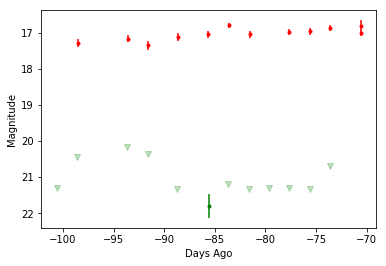

In [19]:
plot_dc_lightcurve(dflc)